In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

# Load the dataset

In [26]:
path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"
mall_customers_df =  pd.read_csv(path)
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Display basic information about the dataset

In [27]:
print("Shape of the dataset:", mall_customers_df.shape)

Shape of the dataset: (200, 5)


In [28]:
print("Description of the dataset:")
print(mall_customers_df.describe())

Description of the dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [29]:
print("Data types:")
print(mall_customers_df.dtypes)

Data types:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [30]:
print("Number of missing values:")
print(mall_customers_df.isnull().sum())

Number of missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Set plotting style

In [31]:
plt.style.use('fivethirtyeight')

# Plot histograms

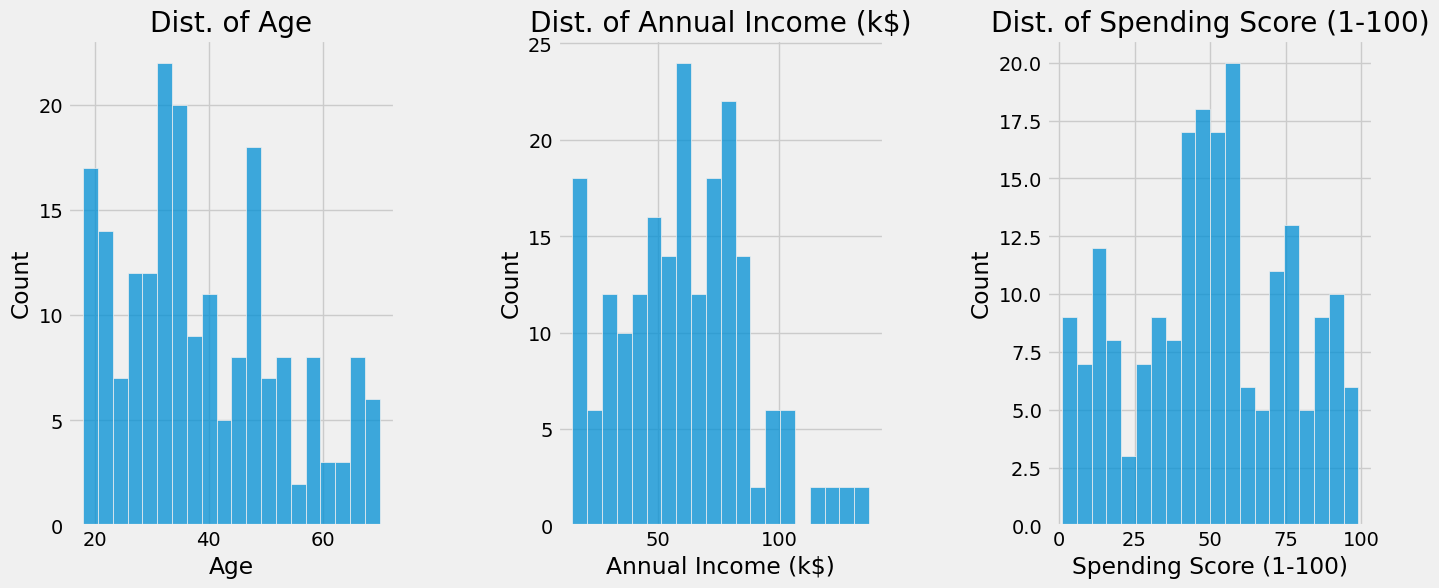

In [32]:
plt.figure(1, figsize=(15, 6))
plot_num = 0
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plot_num += 1
    plt.subplot(1, 3, plot_num)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(mall_customers_df[column], bins=20)
    plt.title('Dist. of {}'.format(column)) #Distribution
plt.show()

# Plot gender distribution

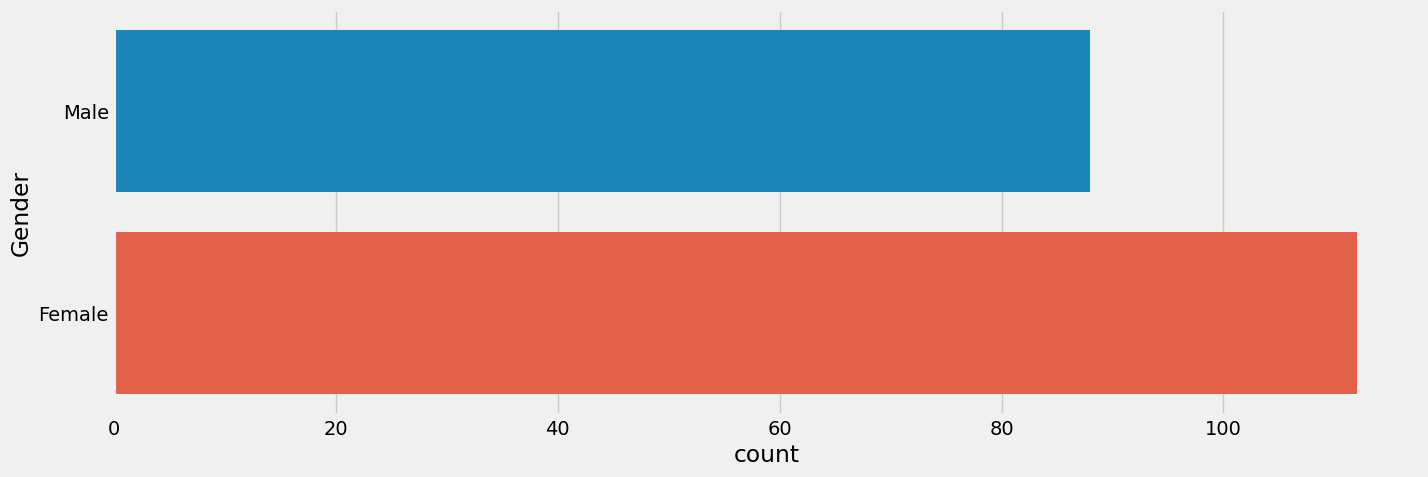

In [33]:
plt.figure(1, figsize=(15, 5))
sns.countplot(y='Gender', data=mall_customers_df)
plt.show()

# Scatter plots

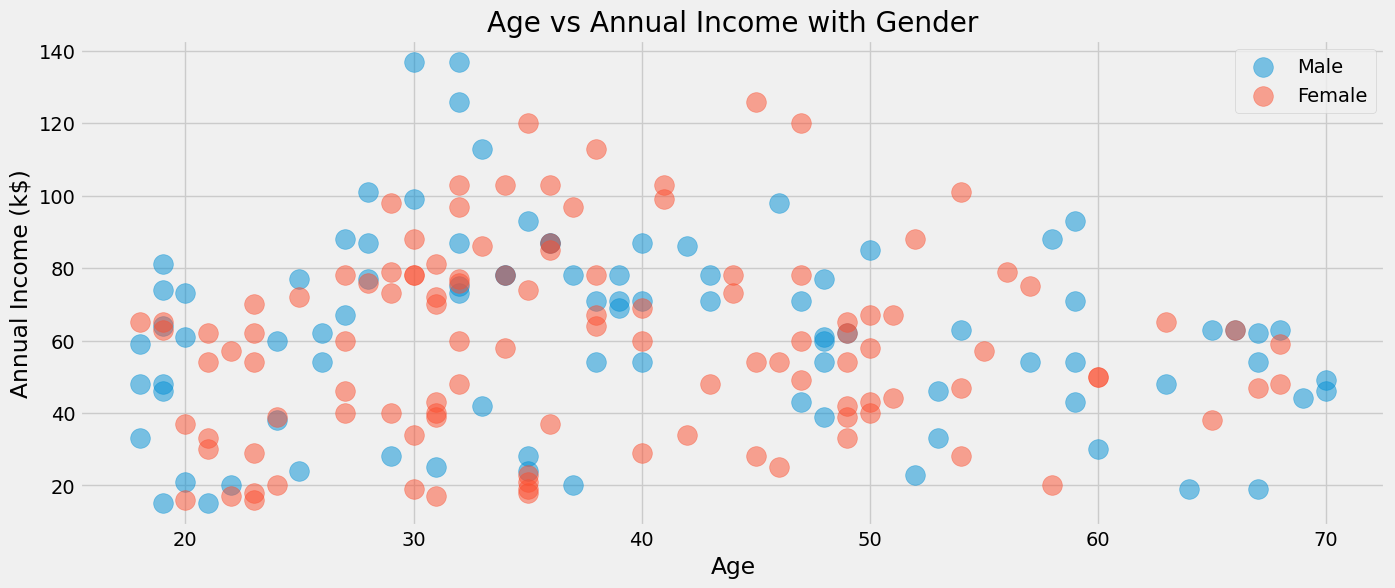

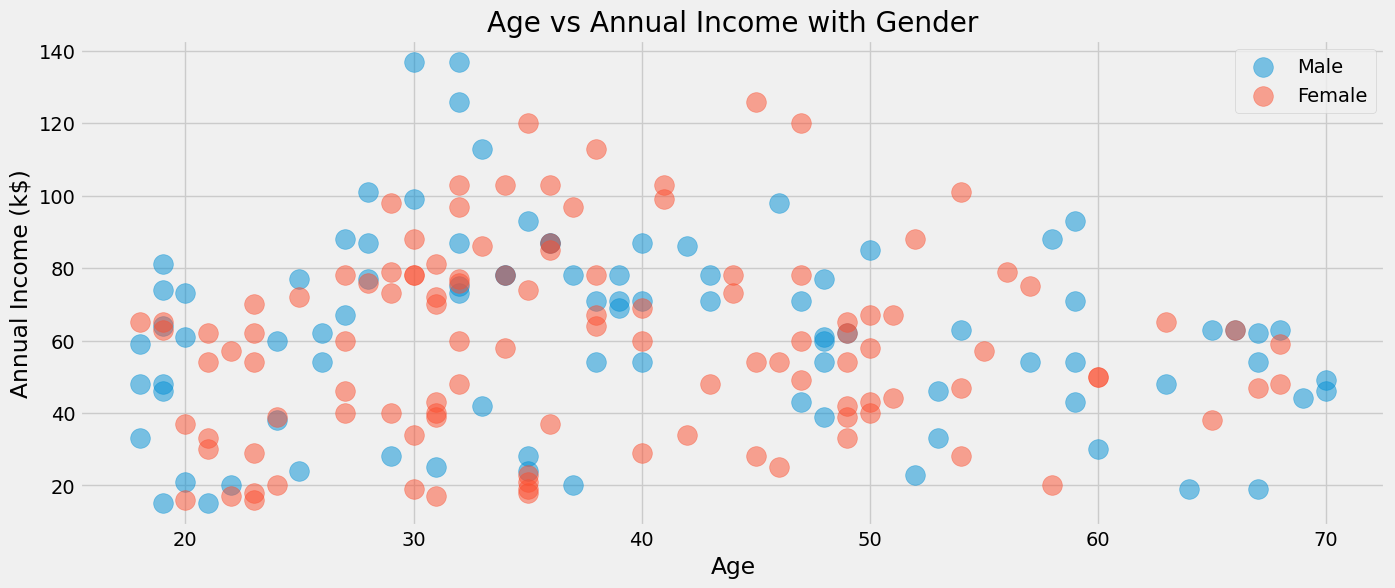

In [34]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Age',
        y='Annual Income (k$)',
        data=mall_customers_df[mall_customers_df['Gender'] == gender],
        s=200,
        alpha=0.5,
        label=gender
    )
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income with Gender')
plt.legend()
plt.show()# Scatter plots
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Age',
        y='Annual Income (k$)',
        data=mall_customers_df[mall_customers_df['Gender'] == gender],
        s=200,
        alpha=0.5,
        label=gender
    )
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income with Gender')
plt.legend()
plt.show()

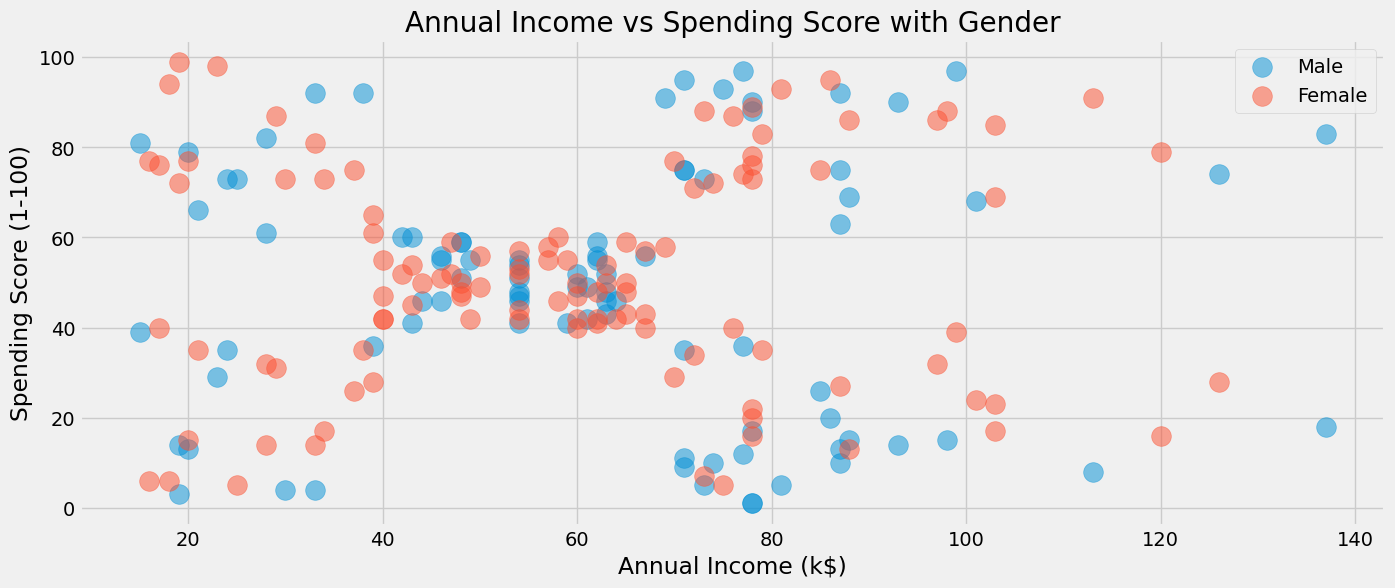

In [35]:
plt.figure(1, figsize=(15, 6))
for gender in ['Male', 'Female']:
    plt.scatter(
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        data=mall_customers_df[mall_customers_df['Gender'] == gender],
        s=200,
        alpha=0.5,
        label=gender
    )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score with Gender')
plt.legend()
plt.show()

# Violin and swarm plots

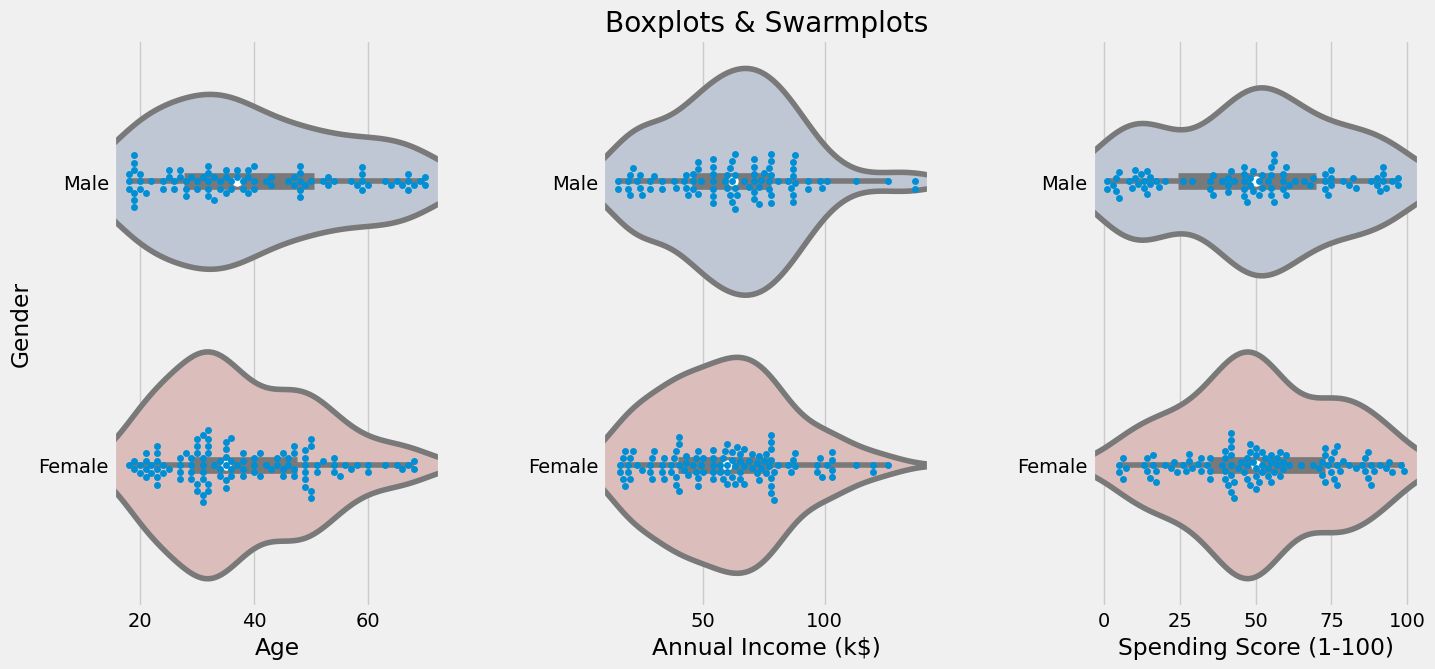

In [36]:
plt.figure(1, figsize=(15, 7))
plot_num = 0
for column in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plot_num += 1
    plt.subplot(1, 3, plot_num)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=column, y='Gender', data=mall_customers_df, palette='vlag')
    sns.swarmplot(x=column, y='Gender', data=mall_customers_df)
    plt.ylabel('Gender' if plot_num == 1 else '')
    plt.title('Boxplots & Swarmplots' if plot_num == 2 else '')
plt.show()

# K-Means Clustering

## Age and Spending Score

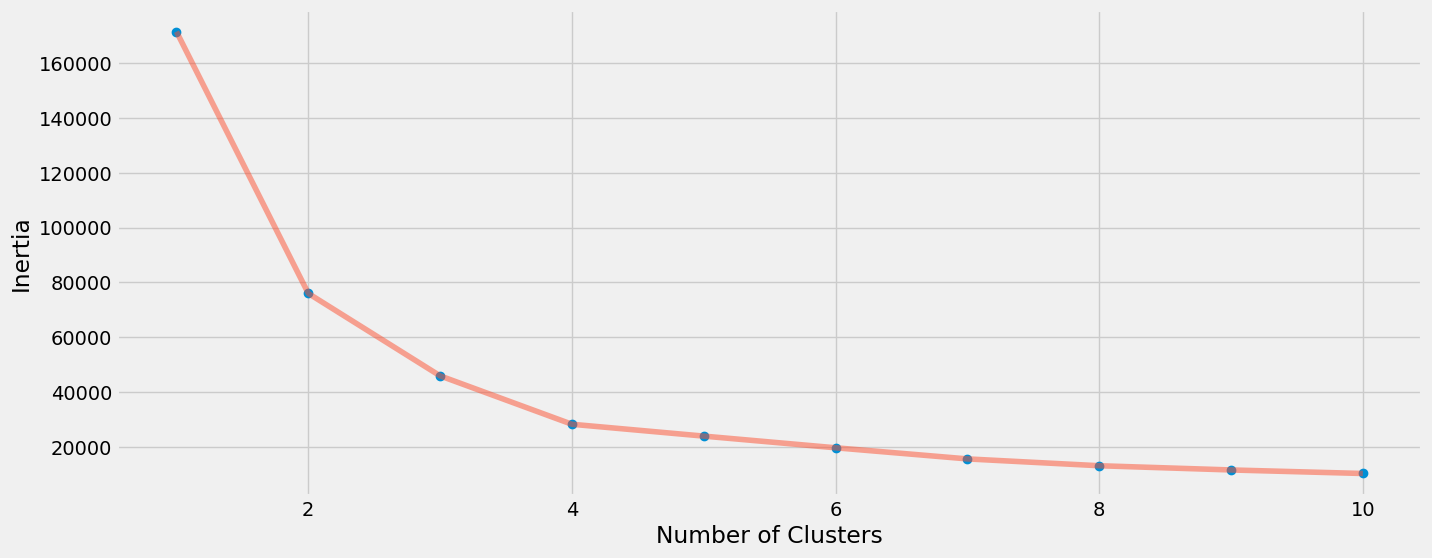

In [37]:
X_age_spending = mall_customers_df[['Age', 'Spending Score (1-100)']].values
inertia_age_spending = []
for n_clusters in range(1, 11):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='lloyd'
    )
    kmeans.fit(X_age_spending)
    inertia_age_spending.append(kmeans.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia_age_spending, 'o')
plt.plot(np.arange(1, 11), inertia_age_spending, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
kmeans_age_spending = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
kmeans_age_spending.fit(X_age_spending)
labels_age_spending = kmeans_age_spending.labels_
centroids_age_spending = kmeans_age_spending.cluster_centers_

# Plot K-Means clustering result for Age and Spending Score

In [39]:
h = 0.02
x_min_age, x_max_age = X_age_spending[:, 0].min() - 1, X_age_spending[:, 0].max() + 1
y_min_age, y_max_age = X_age_spending[:, 1].min() - 1, X_age_spending[:, 1].max() + 1
xx_age, yy_age = np.meshgrid(np.arange(x_min_age, x_max_age, h), np.arange(y_min_age, y_max_age, h))
Z_age_spending = kmeans_age_spending.predict(np.c_[xx_age.ravel(), yy_age.ravel()])


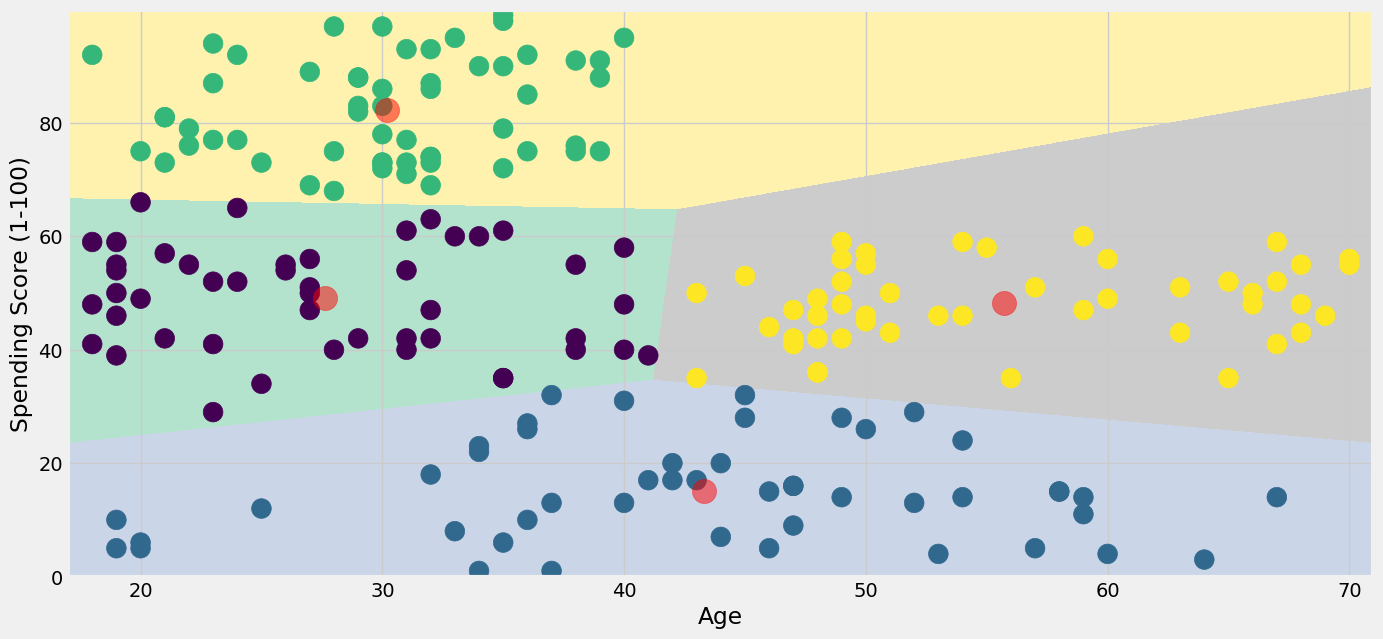

In [40]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z_age_spending = Z_age_spending.reshape(xx_age.shape)
plt.imshow(
    Z_age_spending,
    interpolation='nearest',
    extent=(xx_age.min(), xx_age.max(), yy_age.min(), yy_age.max()),
    cmap=plt.cm.Pastel2,
    aspect='auto',
    origin='lower'
)

plt.scatter(
    x='Age',
    y='Spending Score (1-100)',
    data=mall_customers_df,
    c=labels_age_spending,
    s=200
)
plt.scatter(
    x=centroids_age_spending[:, 0],
    y=centroids_age_spending[:, 1],
    s=300,
    c='red',
    alpha=0.5
)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Age')
plt.show()

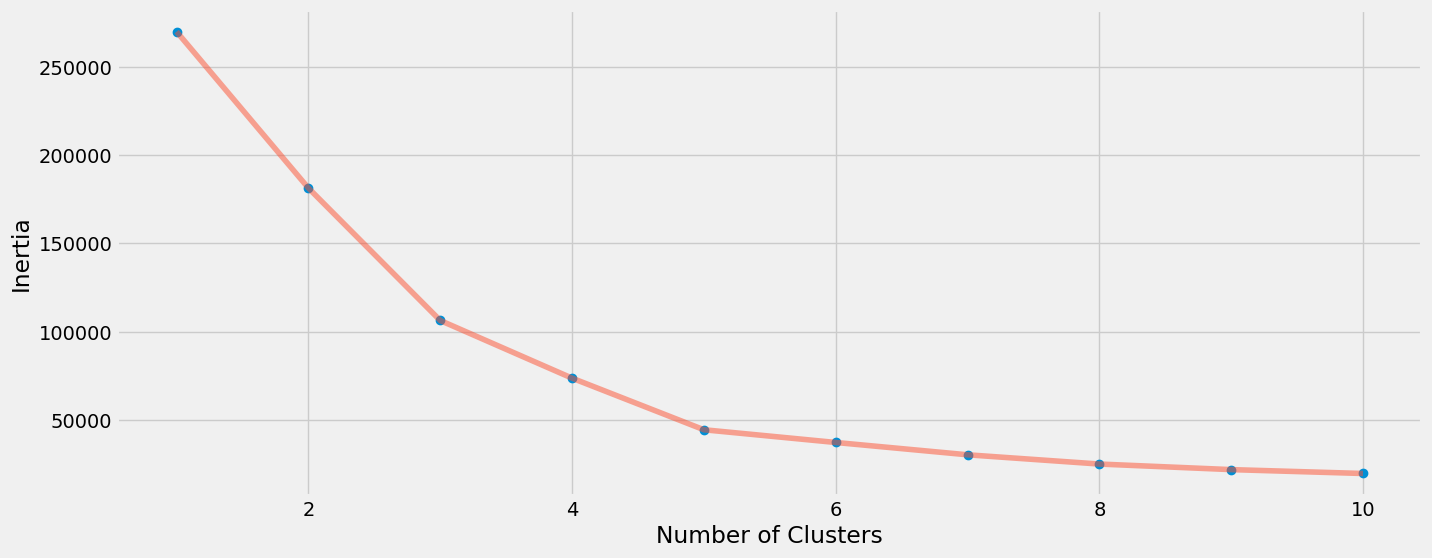

In [41]:
# Annual Income and Spending Score
X_income_spending = mall_customers_df[['Annual Income (k$)', 'Spending Score (1-100)']].values
inertia_income_spending = []
for n_clusters in range(1, 11):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='lloyd'
    )
    kmeans.fit(X_income_spending)
    inertia_income_spending.append(kmeans.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia_income_spending, 'o')
plt.plot(np.arange(1, 11), inertia_income_spending, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [42]:
kmeans_income_spending = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    random_state=111,
    algorithm='elkan'
)
kmeans_income_spending.fit(X_income_spending)
labels_income_spending = kmeans_income_spending.labels_
centroids_income_spending = kmeans_income_spending.cluster_centers_

# Plot K-Means clustering result for Annual Income and Spending Score

In [43]:
h = 0.02
x_min_income, x_max_income = X_income_spending[:, 0].min() - 1, X_income_spending[:, 0].max() + 1
y_min_income, y_max_income = X_income_spending[:, 1].min() - 1, X_income_spending[:, 1].max() + 1
xx_income, yy_income = np.meshgrid(np.arange(x_min_income, x_max_income, h), np.arange(y_min_income, y_max_income, h))
Z_income_spending = kmeans_income_spending.predict(np.c_[xx_income.ravel(), yy_income.ravel()])

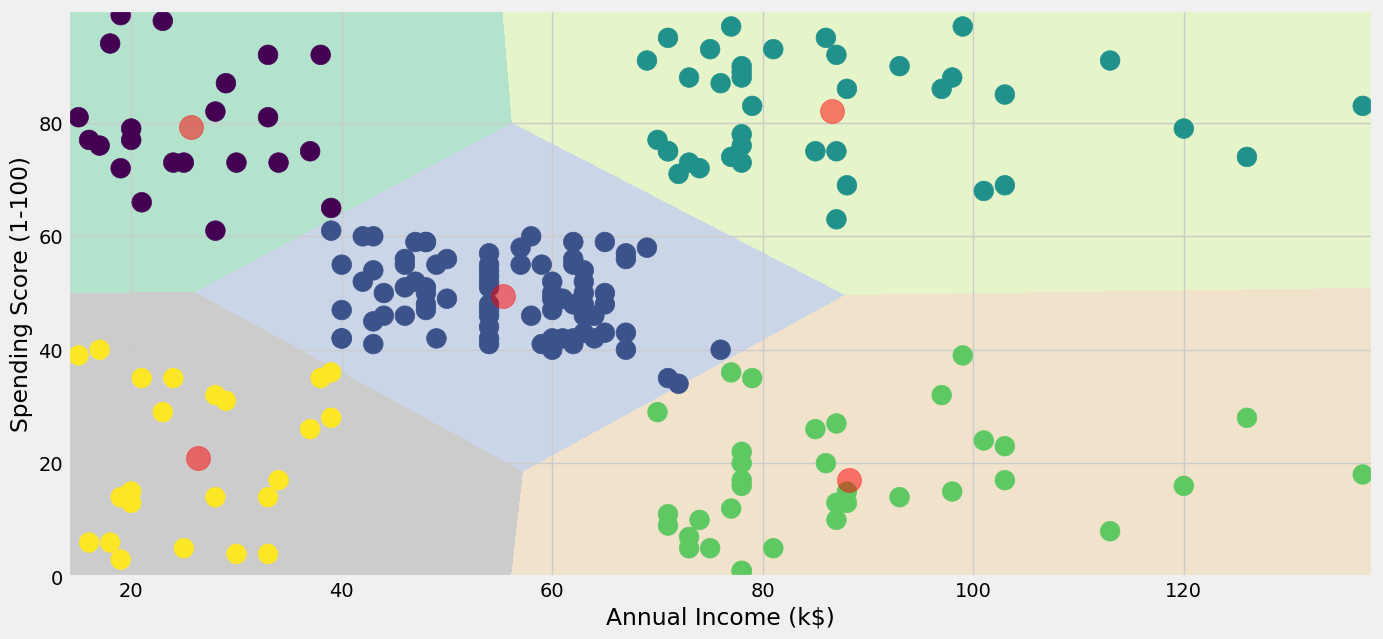

In [44]:
plt.figure(1, figsize=(15, 7))
plt.clf()
Z_income_spending = Z_income_spending.reshape(xx_income.shape)
plt.imshow(
    Z_income_spending,
    interpolation='nearest',
    extent=(xx_income.min(), xx_income.max(), yy_income.min(), yy_income.max()),
    cmap=plt.cm.Pastel2,
    aspect='auto',
    origin='lower'
)

plt.scatter(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=mall_customers_df,
    c=labels_income_spending,
    s=200
)
plt.scatter(
    x=centroids_income_spending[:, 0],
    y=centroids_income_spending[:, 1],
    s=300,
    c='red',
    alpha=0.5
)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.show()

# Age, Annual Income, and Spending Score

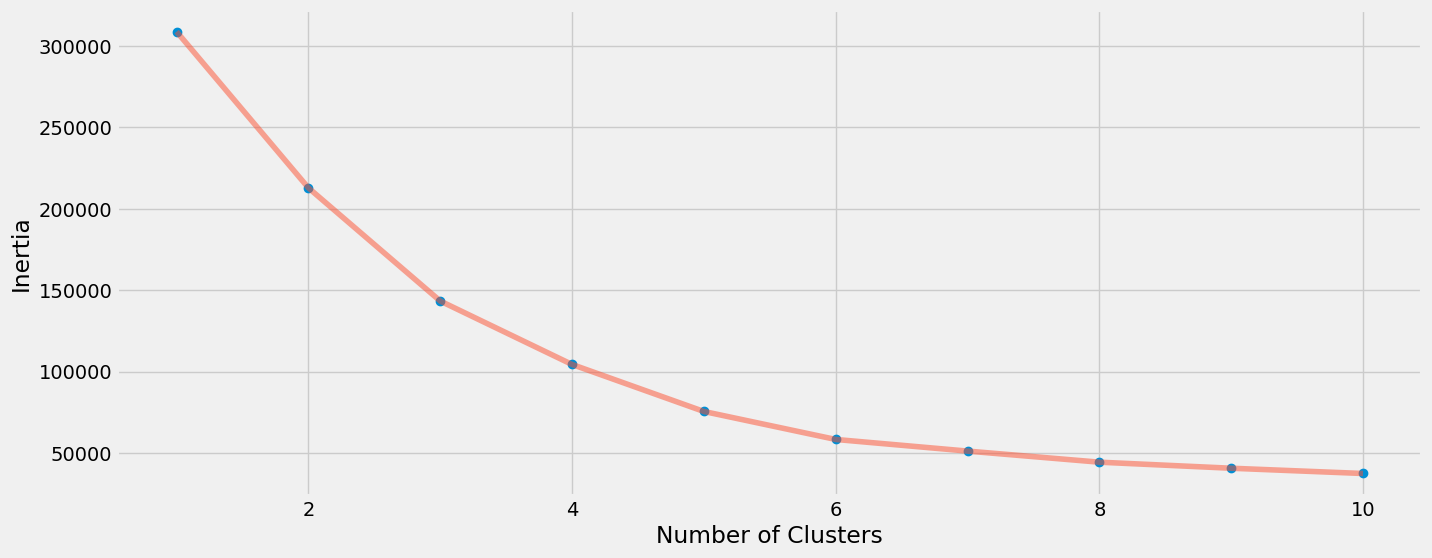

In [45]:
X_age_income_spending = mall_customers_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
inertia_age_income_spending = []
for n_clusters in range(1, 11):
    kmeans = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=111,
        algorithm='lloyd'
    )
    kmeans.fit(X_age_income_spending)
    inertia_age_income_spending.append(kmeans.inertia_)

plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia_age_income_spending, 'o')
plt.plot(np.arange(1, 11), inertia_age_income_spending, '-', alpha=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
labels_age_income_spending = kmeans.labels_

# 3D Scatter Plot for Age, Annual Income, and Spending Score

In [47]:
mall_customers_df['Cluster_Labels'] = labels_age_income_spending
trace1 = go.Scatter3d(
    x=mall_customers_df['Age'],
    y=mall_customers_df['Spending Score (1-100)'],
    z=mall_customers_df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=mall_customers_df['Cluster_Labels'],
        size=20,
        line=dict(
            color=mall_customers_df['Cluster_Labels'],
            width=12
        ),
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Spending Score'),
        zaxis=dict(title='Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)